<a href="https://colab.research.google.com/github/JavZon/Course_WM/blob/main/Student_Depression_Classification_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Main purpose of this project is to predict the depression status of students according to some factors.

These datasets are valuable for research in psychology, data science, and education to identify **factors contributing** to student depression and to design early intervention strategies.

In [29]:
df=pd.read_csv('/content/Student Depression Dataset.csv')
df.head(2)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0


**INFO**

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [31]:
df.drop(columns=['id'], inplace=True)

In [32]:
df = df.rename(columns={df.columns[12]: 'Suicide_thought', df.columns[15]: 'Fam_Hist_Men_Illnes'})

In [33]:
df.sample(2)

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicide_thought,Work/Study Hours,Financial Stress,Fam_Hist_Men_Illnes,Depression
27245,Female,32.0,Patna,Student,4.0,0.0,5.08,2.0,0.0,7-8 hours,Moderate,B.Tech,No,5.0,4.0,Yes,1
10824,Female,29.0,Patna,Student,4.0,0.0,8.04,5.0,0.0,More than 8 hours,Moderate,B.Pharm,Yes,0.0,1.0,No,0


In [34]:
df.isnull().sum()

,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0
Sleep Duration,0


As only 3 NaNs in our dataset, we drop them

In [35]:
df.dropna(inplace=True)

In [36]:
df['Gender'].value_counts()

,count
Gender,
Male,15546
Female,12352


In [37]:
df['Gender']=df['Gender'].map({'Male':1, 'Female':0})

In [38]:
df['City'].value_counts()

,count
City,
Kalyan,1570
Srinagar,1372
Hyderabad,1339
Vasai-Virar,1290
Lucknow,1155
Thane,1139
Ludhiana,1111
Agra,1094
Surat,1078


In [39]:
df['Profession'].value_counts()

,count
Profession,
Student,27867
Architect,8
Teacher,6
Digital Marketer,3
Chef,2
Content Writer,2
Pharmacist,2
Doctor,2
UX/UI Designer,1


Since all the data is about students and the percentage of students is 99%. It will result our model's performance and it can be biased towards one feature. So we drop all other professions and continue only with students

In [40]:
df=df[df['Profession']=='Student']

df['Profession'].value_counts()

,count
Profession,
Student,27867


After this our Profession column has only 1 feature so it is not important now. So we might drop this column too.

In [41]:
df.drop(columns=['Profession'], inplace=True)

In [42]:
df.sample(1)

,Gender,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicide_thought,Work/Study Hours,Financial Stress,Fam_Hist_Men_Illnes,Depression
11523,0,20.0,Kolkata,3.0,0.0,8.91,1.0,0.0,7-8 hours,Moderate,Class 12,Yes,11.0,5.0,No,1


In [43]:
df['Sleep Duration'].value_counts()

,count
Sleep Duration,
Less than 5 hours,8302
7-8 hours,7337
5-6 hours,6175
More than 8 hours,6035
Others,18


Here as well, our features are well balanced except **Others**. Since our dataset is big enough we drop **Others** to avoid bias.

In [44]:
df=df[df['Sleep Duration']!='Others']

In [45]:
df['Sleep Duration']=df['Sleep Duration'].map({'Less than 5 hours':1,
                                              '5-6 hours':2, '7-8 hours':3, 'More than 8 hours':4 })

In [46]:
df.sample(2)

,Gender,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicide_thought,Work/Study Hours,Financial Stress,Fam_Hist_Men_Illnes,Depression
24181,1,26.0,Jaipur,4.0,0.0,8.04,3.0,0.0,1,Healthy,BCA,Yes,11.0,4.0,Yes,1
15940,1,33.0,Vadodara,3.0,0.0,5.38,4.0,0.0,4,Unhealthy,M.Ed,Yes,6.0,3.0,Yes,0


In [47]:
df['Dietary Habits'].value_counts()

,count
Dietary Habits,
Unhealthy,10300
Moderate,9903
Healthy,7634
Others,12


In [48]:
df['Degree'].value_counts()

,count
Degree,
Class 12,6080
B.Ed,1862
B.Com,1505
B.Arch,1475
BCA,1431
MSc,1185
B.Tech,1152
MCA,1041
M.Tech,1020


In [49]:
df['Suicide_thought'].value_counts()

,count
Suicide_thought,
Yes,17620
No,10229


In [50]:
df['Suicide_thought']=df['Suicide_thought'].map({"Yes":1, 'No':0})

In [51]:
df['Fam_Hist_Men_Illnes'].value_counts()

,count
Fam_Hist_Men_Illnes,
No,14373
Yes,13476


In [52]:
df['Fam_Hist_Men_Illnes']=df['Fam_Hist_Men_Illnes'].map({'Yes':1, 'No':0})

**Preprocessing**

In [53]:
df.sample(2)

,Gender,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicide_thought,Work/Study Hours,Financial Stress,Fam_Hist_Men_Illnes,Depression
4868,1,20.0,Indore,3.0,0.0,8.04,1.0,0.0,3,Moderate,Class 12,1,4.0,5.0,0,1
15222,1,23.0,Jaipur,4.0,0.0,8.89,4.0,0.0,4,Unhealthy,B.Arch,1,11.0,3.0,0,1


In [60]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

label_encoder=LabelEncoder()
one_hot_encoder=OneHotEncoder(sparse_output=False)

In [58]:
df['Dietary Habits'].value_counts()

,count
Dietary Habits,
Unhealthy,10300
Moderate,9903
Healthy,7634
Others,12


In [59]:
df['Dietary Habits']=one_hot_encoder.fit_transform(df[['Dietary Habits']])

In [61]:
label_cols=['City','Dietary Habits','Degree']

def label_en(df,cols):
  for col in cols:
    df[col]=label_encoder.fit_transform(df[col])
  return df

df=label_en(df, label_cols)
df.sample(3)

,Gender,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicide_thought,Work/Study Hours,Financial Stress,Fam_Hist_Men_Illnes,Depression
27443,1,24.0,49,3.0,0.0,6.16,3.0,0.0,1,0,4,0,11.0,2.0,0,0
12393,1,31.0,49,3.0,0.0,6.99,2.0,0.0,3,0,22,1,12.0,1.0,1,0
18891,1,32.0,39,1.0,0.0,7.39,1.0,0.0,2,1,21,1,11.0,4.0,0,0


**Visualization**

In [62]:
df.head(2)

,Gender,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicide_thought,Work/Study Hours,Financial Stress,Fam_Hist_Men_Illnes,Depression
0,1,33.0,51,5.0,0.0,8.97,2.0,0.0,2,1,3,1,3.0,1.0,0,1
1,0,24.0,3,2.0,0.0,5.90,5.0,0.0,2,0,10,0,3.0,2.0,1,0


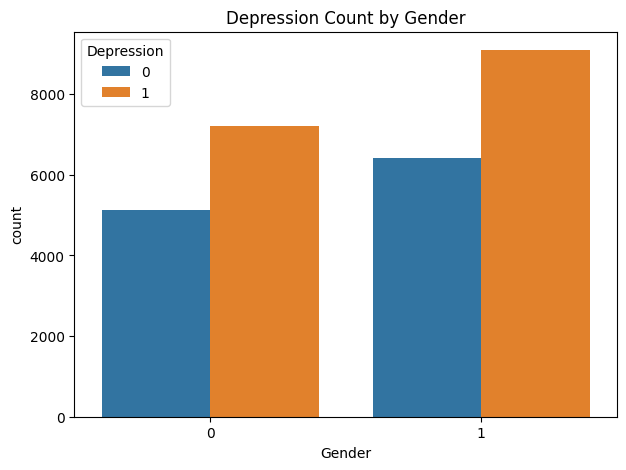

In [63]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Gender', hue='Depression')
plt.title('Depression Count by Gender')
plt.show()

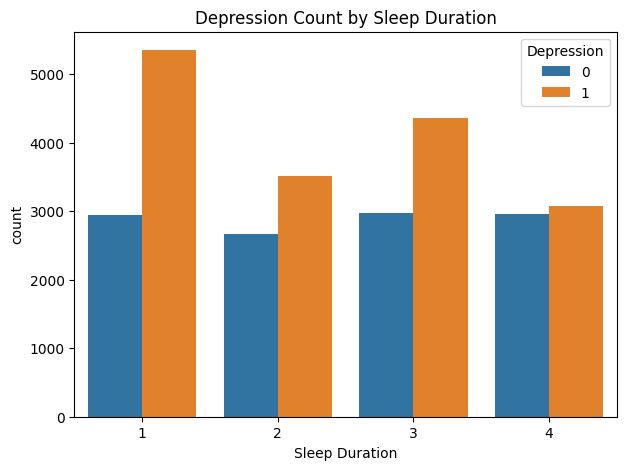

In [64]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Sleep Duration', hue='Depression')
plt.title('Depression Count by Sleep Duration')
plt.show()

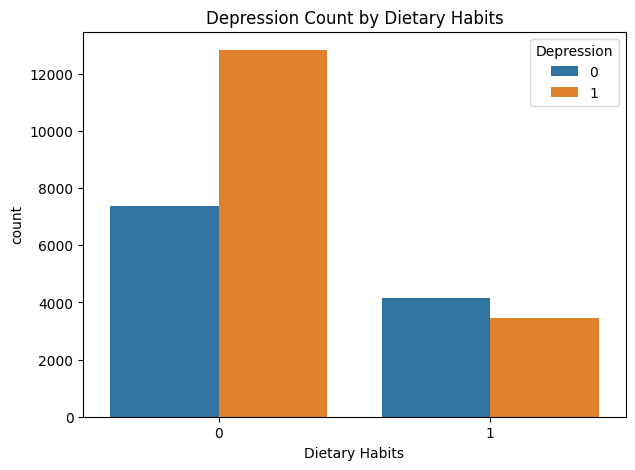

In [65]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Dietary Habits', hue='Depression')
plt.title('Depression Count by Dietary Habits')
plt.show()

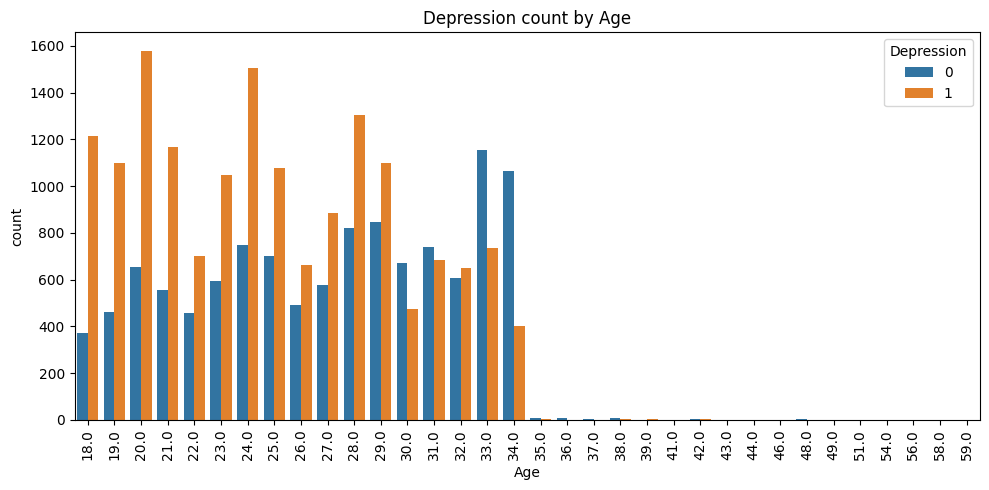

In [66]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Age', hue='Depression')
plt.xticks(rotation=90)
plt.title('Depression count by Age')
plt.tight_layout()
plt.show()


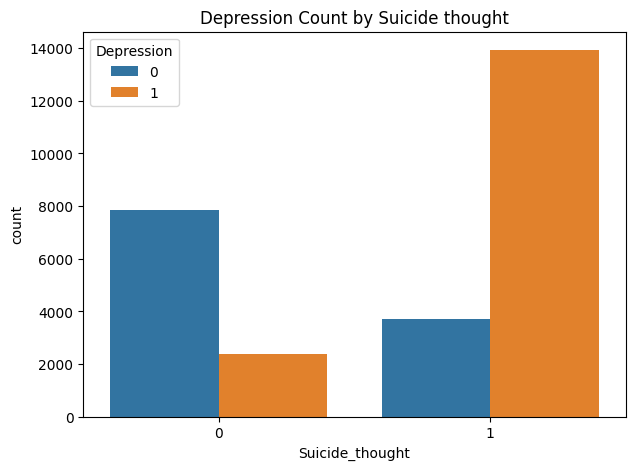

In [67]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Suicide_thought', hue='Depression')
plt.title('Depression Count by Suicide thought')
plt.show()

**Scaling**

In [68]:
X=df.drop(columns='Depression')
y=df['Depression'].copy()

scaler=StandardScaler()

X=scaler.fit_transform(X)

**Splitting data**

In [69]:
len(df)

27849

In [74]:
from sklearn.model_selection import train_test_split as tts

X_train, X_temp, y_train, y_temp=tts(X,y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_temp.shape)
print(y_train.shape)
print(y_temp.shape)

(19494, 15)
(8355, 15)
(19494,)
(8355,)


Assingning validation and test parts of the data

In [75]:
X_val, X_test, y_val, y_test=tts(X_temp, y_temp, test_size=0.5, random_state=42)
print(X_val.shape)
print(X_test.shape)
print(y_val.shape)
print(y_test.shape)

(4177, 15)
(4178, 15)
(4177,)
(4178,)


In [76]:
#metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
#algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

**Log.Reg**

In [77]:
lr_model=LogisticRegression()  #create model

lr_model.fit(X_train, y_train)  #train model

y_val_pred=lr_model.predict(X_val)  #predict validation set

acc_score=accuracy_score(y_val,y_val_pred)  #evaluating metrics
print('Accuracy score is - ', acc_score)
print(f'Classification report - {classification_report(y_val,y_val_pred)}')
print(f'Confusion matrix - {confusion_matrix(y_val,y_val_pred)}')

Accuracy score is -  0.849174048360067
Classification report -               precision    recall  f1-score   support

           0       0.84      0.80      0.82      1763
           1       0.86      0.89      0.87      2414

    accuracy                           0.85      4177
   macro avg       0.85      0.84      0.84      4177
weighted avg       0.85      0.85      0.85      4177

Confusion matrix - [[1402  361]
 [ 269 2145]]


**RANDOM FOREST**

In [79]:
rf_model=RandomForestClassifier()  #create model

rf_model.fit(X_train, y_train)  #train model

y_val_pred=rf_model.predict(X_val)  #predict validation set

acc_score=accuracy_score(y_val,y_val_pred)  #evaluating metrics
print('Accuracy score is - ', acc_score)
print(f'Classification report -{classification_report(y_val,y_val_pred)}')
print(f'Confusion matrix - {confusion_matrix(y_val,y_val_pred)}')

Accuracy score is -  0.8429494852765143
Classification report -              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1763
           1       0.85      0.88      0.87      2414

    accuracy                           0.84      4177
   macro avg       0.84      0.84      0.84      4177
weighted avg       0.84      0.84      0.84      4177

Confusion matrix - [[1398  365]
 [ 291 2123]]


**KNN**

In [80]:
knn=KNeighborsClassifier()

knn.fit(X_train, y_train)  #train model

y_val_pred=knn.predict(X_val)  #predict validation set

acc_score=accuracy_score(y_val,y_val_pred)  #evaluating metrics
print('Accuracy score is - ', acc_score)
print(f'Classification report -{classification_report(y_val,y_val_pred)}')
print(f'Confusion matrix - {confusion_matrix(y_val,y_val_pred)}')

Accuracy score is -  0.8185300454871918
Classification report -              precision    recall  f1-score   support

           0       0.81      0.74      0.78      1763
           1       0.82      0.87      0.85      2414

    accuracy                           0.82      4177
   macro avg       0.82      0.81      0.81      4177
weighted avg       0.82      0.82      0.82      4177

Confusion matrix - [[1312  451]
 [ 307 2107]]


**SVC**

In [81]:
svc_model=SVC()

svc_model.fit(X_train, y_train)  #train model

y_val_pred=svc_model.predict(X_val)  #predict validation set

acc_score=accuracy_score(y_val,y_val_pred)  #evaluating metrics
print('Accuracy score is - ', acc_score)
print(f'Classification report -{classification_report(y_val,y_val_pred)}')
print(f'Confusion matrix - {confusion_matrix(y_val,y_val_pred)}')

Accuracy score is -  0.848455829542734
Classification report -              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1763
           1       0.85      0.89      0.87      2414

    accuracy                           0.85      4177
   macro avg       0.85      0.84      0.84      4177
weighted avg       0.85      0.85      0.85      4177

Confusion matrix - [[1385  378]
 [ 255 2159]]


In [82]:
ACCURACY_SCORE={'LR':0.8491,
                'RF':0.8429,
                'KNN':0.8185,
                'SVC':0.8484}

Savollar :

1) City columnida 50 ta har xil qiymat bor. Shularni LabelEncoder orqali numeric qiymatlarga o'tkazdim. Bundan boshqa yo'llari bormi?

2)Profession columnida Student eng ko'p 99% ekan. Qolganlari esa juda oz shu sababli qolganlarini tashlab yubordim. Chunki model bir tomonga og'ib ketishi mumkin deb o'yladim (bias). Shu qilingan ish to'grimi?

3)Xuddi shu vaziyat Sleep Hours columnida ham kuzatildi?